Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [2]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [3]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

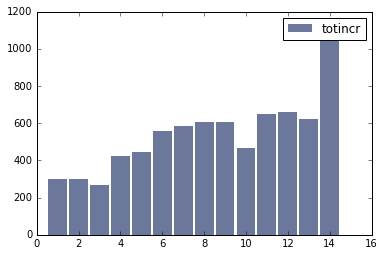

In [4]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

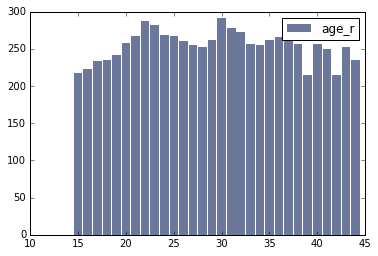

In [5]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

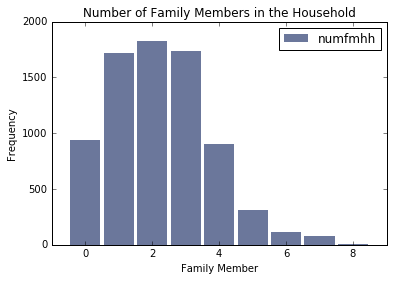

In [7]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show(xlabel='Number of Family Members', ylabel='Frequency',title='Number of Family Members in the Household')

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

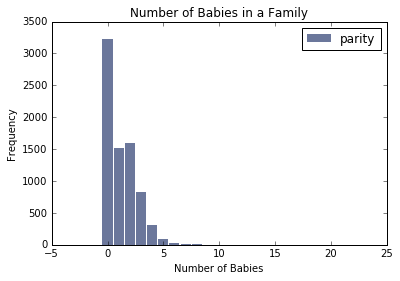

In [9]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show(xlabel='Number of Babies', ylabel='Frequency',title='Number of Babies in a Family')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [19]:
for i in range (0,len (hist.Largest(6))-1):
    print "Number of Babies:" + str(hist.Largest(5)[i][0]) + "  Frequency:" + str(hist.Largest(5)[i][1])

Number of Babies:22  Frequency:1
Number of Babies:16  Frequency:1
Number of Babies:10  Frequency:3
Number of Babies:9  Frequency:2
Number of Babies:8  Frequency:8


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

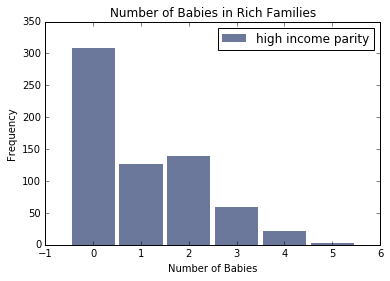

In [23]:
"Computing parity of people earning more than $75,000"
target = resp[resp.totincr==12]
hist = thinkstats2.Hist(target.parity)
thinkplot.Hist(hist, label='high income parity')
thinkplot.Show(xlabel='Number of Babies', ylabel='Frequency',title='Number of Babies in Rich Families')

Find the largest parities for high income respondents.

In [24]:
target = resp[resp.totincr==12]
hist = thinkstats2.Hist(target.parity)
for i in range (0,len (hist.Largest(6))-1):
    print "Number of Babies:" + str(hist.Largest(5)[i][0]) + "  Frequency:" + str(hist.Largest(5)[i][1])

Number of Babies:5  Frequency:3
Number of Babies:4  Frequency:21
Number of Babies:3  Frequency:60
Number of Babies:2  Frequency:140
Number of Babies:1  Frequency:126


Compare the mean <tt>parity</tt> for high income respondents and others.

In [28]:
target = resp[resp.totincr==12]
others = resp[resp.totincr < 12]
print "Rich people's average parirty: " + str(target.parity.mean())
print "Normal people's average parirty: " + str(others.parity.mean())

Rich people's average parirty: 1.04103343465
Normal people's average parirty: 1.30661284121


Investigate any other variables that look interesting.

In [32]:
"Compare the mean education level between high income respondents and others."
target = resp[resp.totincr >= 12]
others = resp[resp.totincr < 12]
print "Rich people's average education level:" + str(target.higrade.mean())
print "Normal people's average education level: " + str(others.higrade.mean())

Rich people's average education level(the higher the better): 14.4748054076
Normal people's average education level: 12.7579777009


### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [34]:
import nsfg
preg = nsfg.ReadFemPreg()[preg.outcome == 1]
first_mean = preg[preg.birthord == 1].totalwgt_lb.mean()
other_mean = preg[preg.birthord != 1].totalwgt_lb.mean()
cohen_d = thinkstats2.CohenEffectSize(preg[preg.birthord == 1].totalwgt_lb, preg[preg.birthord != 1].totalwgt_lb)
print "First Born Mean: ",first_mean, 
print "Not First Born Mean: ",other_mean
print "Cohen's d ", cohen_d

First Born Mean:  7.20109443044   Not First Born Mean:  7.32585561497
Cohen's d  -0.0886729270726
